## K Means Clustering

### Aim
To cluster the data points using K Means Clustering algorithm

### Dataset
Seed Dataset

### Source
UCI Repository

In [ ]:
# Importing the required modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Seed dataset
# area A,
# perimeter P,
# compactness C = 4piA/P^2,
# length of kernel,
# width of kernel,
# asymmetry coefficient
# length of kernel groove.

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Seed_Data.csv")
data=data.drop("target",axis=1)

In [ ]:
data.shape

(210, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


The inertia for 1 clusters is :  2719.8524
The inertia for 2 clusters is :  1011.7123
The inertia for 3 clusters is :  587.3186
The inertia for 4 clusters is :  471.0034
The inertia for 5 clusters is :  385.5357
The inertia for 6 clusters is :  323.8051
The inertia for 7 clusters is :  277.7319
The inertia for 8 clusters is :  252.8907
The inertia for 9 clusters is :  216.8311
The inertia for 10 clusters is :  197.9661
The inertia for 11 clusters is :  184.9143
The inertia for 12 clusters is :  170.0659
The inertia for 13 clusters is :  158.9712
The inertia for 14 clusters is :  146.0984


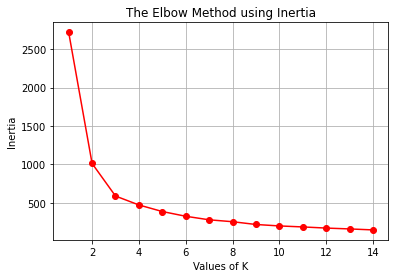

In [ ]:
# Elbow method

i=[]
for j in range(1,15):
    km=KMeans(n_clusters=j)
    km.fit_predict(data)
    inertia=round(km.inertia_,4)
    i.append(inertia)
    print("The inertia for",j,"clusters is : ",inertia)


k=range(1,15)
plt.plot(k, i, 'ro-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=3)
y=km.fit_predict(data)
print("\n\n Cluster Centres \n\n",km.cluster_centers_)



 Cluster Centres 

 [[11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]]


In [ ]:
X=np.array(data)

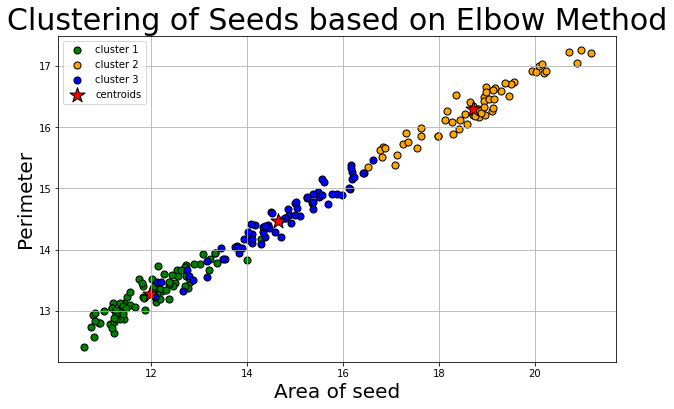

In [ ]:
# plot the 3 clusters
plt.figure(figsize=(10,6))
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    c='green',s=50,
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    c='orange',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y== 2, 0], X[y== 2, 1],
    c='blue',s=50,
    marker='o', edgecolor='black',
    label='cluster 3'
)



# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    marker='*',s=250,
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("Clustering of Seeds based on Elbow Method",fontsize=30)
plt.xlabel("Area of seed",fontsize=20)
plt.ylabel("Perimeter",fontsize=20)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

The silhoutte for 2 clusters is :  0.5183
The silhoutte for 3 clusters is :  0.4719
The silhoutte for 4 clusters is :  0.4125
The silhoutte for 5 clusters is :  0.3613
The silhoutte for 6 clusters is :  0.3666
The silhoutte for 7 clusters is :  0.3512
The silhoutte for 8 clusters is :  0.3612
The silhoutte for 9 clusters is :  0.3538


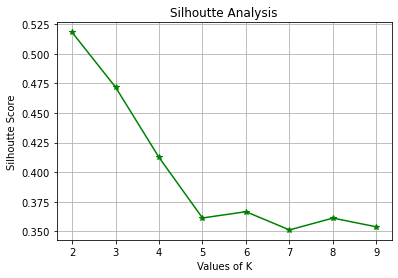

In [ ]:
# Silhoutte Score

i=[]
for j in range(2,10):
    km=KMeans(n_clusters=j)
    km.fit_predict(data)
    score=round(silhouette_score(data,km.labels_,metric='euclidean'),4)
    i.append(score)
    print("The silhoutte for",j,"clusters is : ",score)


k=range(2,10)
plt.plot(k, i, 'g*-')
plt.xlabel('Values of K')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Analysis')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=2)
y=km.fit_predict(data)
print("\n\n Cluster Centres \n\n",km.cluster_centers_)



 Cluster Centres 

 [[12.78428571 13.62992063  0.86219127  5.32327778  3.00334921  3.88510397
   5.0773254 ]
 [17.94238095 15.95333333  0.88420952  6.08641667  3.6414881   3.42284643
   5.90419048]]


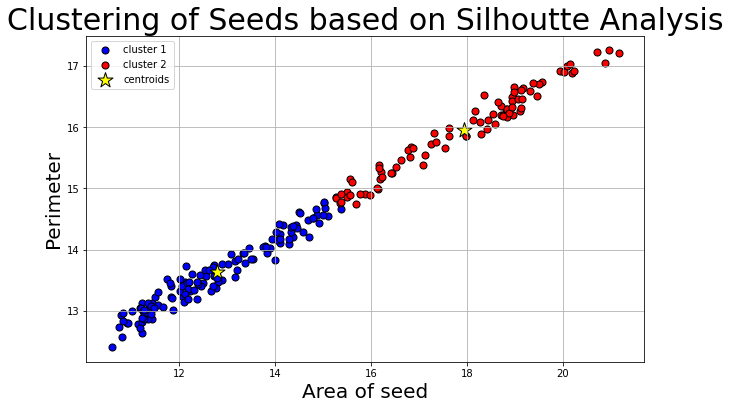

In [ ]:
# plot the 2 clusters
plt.figure(figsize=(10,6))
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    c='blue',s=50,
    marker='o', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    c='red',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    marker='*',s=250,
    c='yellow', edgecolor='black',
    label='centroids'
)

plt.title("Clustering of Seeds based on Silhoutte Analysis",fontsize=30)
plt.legend(scatterpoints=1)
plt.xlabel("Area of seed",fontsize=20)
plt.ylabel("Perimeter",fontsize=20)
plt.grid()
plt.show()

In [ ]:
# We have used Kmeans algorithm to make clusterin
# First we have used elbow method to find the optimal clusters
# To determine the optimum number of clusters we have to select the value
# of k at the elbow the point after which the inertia starts decreasing linearly.
# In the above graph the elbow point is 3
# So we have made 3 clusters

# second we have used silhoutte score method to find the optimal clusters
# To determine the optimum number of clusters we have to select the value of
# k at the point where the silhoutte score is maximum.
# In the above graph the point is 2.
# So we have made 2 clusters

# The major difference between elbow and silhouette scores is that elbow
# only calculates the euclidean distance(for intra cluster centres) whereas silhouette
#  takes into account variables such as variance, skewness, high-low differences, etc.